# Aprendizaje profundo

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Introducción a Theano

Theano es un paquete de software que le permite escribir código simbólico y compilarlo. Fue desarrollado por investigadores de aprendizaje automático en la Universidad de Montreal. Su uso no se limita a las aplicaciones de aprendizaje automático, pero fue diseñado con el aprendizaje automático en mente.

Para la instalación de Theano en Anaconda se han de ejecutar los siguientes comandos en la terminal:

        pip install Theano
        conda install pydot

Ahora se puede utilizar Theano en Anaconda.

In [2]:
import theano
import theano.tensor as T

Couldn't import dot_parser, loading of dot files will not be possible.


## Variables simbólicas

En Theano, todos los algoritmos se definen simbólicamente.

In [3]:
x = T.scalar()
y = x**2

print x, type(x)
print y, type(y)

<TensorType(float64, scalar)> <class 'theano.tensor.var.TensorVariable'>
Elemwise{pow,no_inplace}.0 <class 'theano.tensor.var.TensorVariable'>


En el ejemplo anterior las variables simbólicas `x` e `y` no continente ningún valor, solamente le indica el tipo de variable a Theano.

Para ver el contenido de las variables Theano se puede utilizar la función `pp` (pretty print)

In [4]:
print theano.pp(x)
print theano.pp(y)

<TensorType(float64, scalar)>
(<TensorType(float64, scalar)> ** TensorConstant{2})


## Funciones

Para calcular realmente las cosas con Theano, se definen las funciones simbólicas, que luego se pueden utilizar con valores reales.

Para esto se utiliza el método `theano.function`, a la cual se le ha de indicar los variables de entrada y las variables de salida.

In [5]:
f = theano.function(inputs = [x], outputs = y)
print f(3)

9.0


Alternativamente se puede utilizar el método eval de las variables simbólicas para llamar a las funciones.

In [6]:
print y.eval({x: 3})

9.0


También es posible utilizar las funciones de Python para construir variables en Theano

In [7]:
def square(x):
    return x**2

y = square(x)

f = theano.function(inputs = [x], outputs = y)
print f(3)

9.0


Las funciones implementadas pueden tan complejas como sea necesario

In [8]:
x = T.scalar()
y = T.scalar()

z = x + y

f = theano.function(inputs = [x, y], outputs = z)
print f(1, 2)

def sum_vars(x, y):
    return x + y

z = sum_vars(x, y)

f = theano.function(inputs = [x, y], outputs = z)
print f(3, 4)

3.0
7.0


## Tipos de datos

En Theano existen otros tipos de variables para contener vectores, matrices y tensores, así como las funciones para realizar operaciones con estas variables.

In [9]:
A = T.matrix()
x = T.vector()
b = T.vector()

y = T.dot(A, x) + b
z = T.sum(A**2)

# Las funciones pueden tener valores por defecto.
b_default = np.array([0, 0], dtype = theano.config.floatX)

# Las funciones pueden evaluar varias operaciones.
linear_mix = theano.function(inputs = [A, x, theano.Param(b, default=b_default)], outputs = [y, z])

# Utilizando un valor de b.
print linear_mix(np.array([[1, 2, 3],
                           [4, 5, 6]], dtype = theano.config.floatX), #A
                 np.array([1, 2, 3], dtype = theano.config.floatX), #x
                 np.array([4, 5], dtype = theano.config.floatX)) #b

# Utilizando el valor de b por defecto.
print linear_mix(np.array([[1, 2, 3],
                           [4, 5, 6]]), #A
                 np.array([1, 2, 3])) #x

[array([ 18.,  37.]), array(91.0)]
[array([ 14.,  32.]), array(91.0)]


## Variables compartidas

La variables simbólicas de Theano no tienen valores explícitos, solamente se utilizan para indicar las operaciones a realizar. Las variables compartidas son las que se han de utilizar cuando se desee indicar un valor explícito.

In [10]:
shared_var = theano.shared(np.array([[1, 2], [3, 4]], dtype = theano.config.floatX))
print shared_var.get_value()

shared_var.set_value(np.array([[3, 4], [2, 1]], dtype=theano.config.floatX))
print shared_var.get_value()

[[ 1.  2.]
 [ 3.  4.]]
[[ 3.  4.]
 [ 2.  1.]]


Se pueden crear funciones con variables compartidas que no necesitan parámetros de entrada.

In [11]:
f = theano.function([], shared_var)
print f()

share_fun = shared_var ** 2

f = theano.function(inputs = [], outputs = share_fun)
print f()

[[ 3.  4.]
 [ 2.  1.]]
[[  9.  16.]
 [  4.   1.]]


### Actualización de variables compartidas

Los valores de una variable compartida se pueden actualizar en las funciones utilizando argumentos de actualización. Esto hace que el valor de la variable se cambie también en Python.

In [12]:
subtract = T.matrix()
f_2      = theano.function(inputs = [subtract], outputs = shared_var, updates = {shared_var: shared_var - subtract})

print shared_var.get_value()

f_2(np.array([[1, 1], [1, 1]]))

print shared_var.get_value()

print f()

[[ 3.  4.]
 [ 2.  1.]]
[[ 2.  3.]
 [ 1.  0.]]
[[ 4.  9.]
 [ 1.  0.]]


## Gradientes

Una de las ventajas de utilizar Theano es su capacidad para calcular gradientes de funciones. Esto permite definir una función simbólica y calculas si derivada numérica.

In [13]:
x = T.scalar()
y = x**2

# y_grad = dy/dx
y_grad = T.grad(y, x)

# dy/dx = 2 * x
y_grad.eval({x: 10})

array(20.0)

## Uso de la GPU en Theano

Theano puede compilar de forma transparente en el CPU o el GPU del ordenador (en hardware soportado). Las opciones se pueden configurar en archivos de configuración y consultar en código.

In [14]:
print theano.config.device
print theano.config.floatX

cpu
float64


## Uso de Theano para la estimación de una regresión

En Theano se puede utilizar el gradiente para implementar una función de coste y realizar una estimación lineal.

In [15]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

X = T.scalar()
Y = T.scalar()

def model(X, w):
    return X * w

w = theano.shared(np.asarray(0., dtype = theano.config.floatX))
y = model(X, w)

cost     = T.mean(T.sqr(y - Y))
gradient = T.grad(cost = cost, wrt = w)
updates  = [[w, w - gradient * 0.01]]

train = theano.function(inputs = [X, Y], outputs = cost, updates = updates, allow_input_downcast = True)

for i in range(10):
    for x, y in zip(trX, trY):
        train(x, y)
    print 'En el paso ', i, ' el valor de w es ', w.get_value(), ' y el coste es', cost

En el paso  0  el valor de w es  0.983420399751  y el coste es Sum{acc_dtype=float64}.0
En el paso  1  el valor de w es  1.4761658561  y el coste es Sum{acc_dtype=float64}.0
En el paso  2  el valor de w es  1.72305730234  y el coste es Sum{acc_dtype=float64}.0
En el paso  3  el valor de w es  1.84676293055  y el coste es Sum{acc_dtype=float64}.0
En el paso  4  el valor de w es  1.90874597081  y el coste es Sum{acc_dtype=float64}.0
En el paso  5  el valor de w es  1.9398027411  y el coste es Sum{acc_dtype=float64}.0
En el paso  6  el valor de w es  1.95536382002  y el coste es Sum{acc_dtype=float64}.0
En el paso  7  el valor de w es  1.96316074078  y el coste es Sum{acc_dtype=float64}.0
En el paso  8  el valor de w es  1.96706740906  y el coste es Sum{acc_dtype=float64}.0
En el paso  9  el valor de w es  1.96902485579  y el coste es Sum{acc_dtype=float64}.0


## Aprendizaje profundo

### Funciones para la carga del conjunto de datos

In [18]:
import os

datasets_dir = ''

def one_hot(x,n):
    if type(x) == list:
        x = np.array(x)
    x = x.flatten()
    o_h = np.zeros((len(x),n))
    o_h[np.arange(len(x)),x] = 1
    return o_h

def mnist(ntrain=60000,ntest=10000,onehot=True):
    data_dir = os.path.join(datasets_dir,'mnist/')
    fd = open(os.path.join(data_dir,'train-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    trX = loaded[16:].reshape((60000,28*28)).astype(float)

    fd = open(os.path.join(data_dir,'train-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    trY = loaded[8:].reshape((60000))

    fd = open(os.path.join(data_dir,'t10k-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    teX = loaded[16:].reshape((10000,28*28)).astype(float)

    fd = open(os.path.join(data_dir,'t10k-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    teY = loaded[8:].reshape((10000))

    trX = trX/255.
    teX = teX/255.

    trX = trX[:ntrain]
    trY = trY[:ntrain]

    teX = teX[:ntest]
    teY = teY[:ntest]

    if onehot:
        trY = one_hot(trY, 10)
        teY = one_hot(teY, 10)
    else:
        trY = np.asarray(trY)
        teY = np.asarray(teY)

    return trX,teX,trY,teY

Se importa un conjunto de datos con capturas de imágenes escritas a mano etiquetas.

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


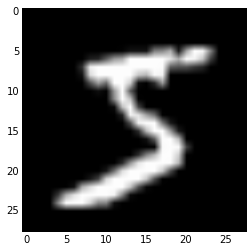

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


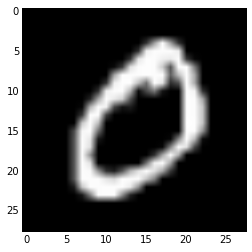

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


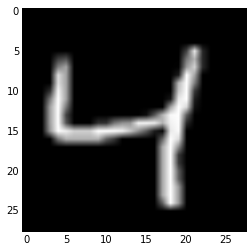

In [19]:
trX, teX, trY, teY = mnist()

print trY[0,:]
imshow(trX[0,:].reshape(28, 28), cmap = mpl.cm.gray)
show()

print trY[1,:]
imshow(trX[1,:].reshape(28, 28), cmap = mpl.cm.gray)
show()

print trY[2,:]
imshow(trX[2,:].reshape(28, 28), cmap = mpl.cm.gray)
show()

### Regresión logística

Se emplea la función tensor.nnet.softmax que tiene la forma
$$
Softmax_{ij}(x) = \frac{\exp(x_{ij})}{\sum_k \exp(x_{ik})}
$$
para modelar las imágenes.

In [20]:
def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

def init_weights(shape):
    return theano.shared(floatX(np.random.randn(*shape) * 0.01))

def model(X, w):
    return T.nnet.softmax(T.dot(X, w))

trX, teX, trY, teY = mnist()

X = T.fmatrix()
Y = T.fmatrix()

w = init_weights((784, 10))

py_x = model(X, w)
y_pred = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
gradient = T.grad(cost=cost, wrt=w)
update = [[w, w - gradient * 0.05]]

train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

for i in range(25):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print i, np.mean(np.argmax(teY, axis=1) == predict(teX))


0 0.8853
1 0.8979
2 0.9046
3 0.9086
4 0.9103
5 0.9115
6 0.9126
7 0.9143
8 0.9155
9 0.9162
10 0.9163
11 0.917
12 0.9175
13 0.9175
14 0.9177
15 0.9178
16 0.9183
17 0.9185
18 0.9191
19 0.9197
20 0.9201
21 0.9202
22 0.9204
23 0.9199
24 0.9202


### Entrenamiento de una red neuronal

El entrenamiento de una red neuronal con dos capas mediante propagación hacia atrás.

In [21]:
def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

def init_weights(shape):
    return theano.shared(floatX(np.random.randn(*shape) * 0.01))

def sgd(cost, params, lr=0.05):
    grads = T.grad(cost=cost, wrt=params)
    updates = []
    for p, g in zip(params, grads):
        updates.append([p, p - g * lr])
    return updates

def model(X, w_h, w_o):
    h = T.nnet.sigmoid(T.dot(X, w_h))
    pyx = T.nnet.softmax(T.dot(h, w_o))
    return pyx

trX, teX, trY, teY = mnist(onehot=True)

X = T.fmatrix()
Y = T.fmatrix()

w_h = init_weights((784, 625))
w_o = init_weights((625, 10))

py_x = model(X, w_h, w_o)
y_x = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
params = [w_h, w_o]
updates = sgd(cost, params)

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_x, allow_input_downcast=True)

for i in range(25):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print i, np.mean(np.argmax(teY, axis=1) == predict(teX))

0 0.7019
1 0.8277
2 0.8672
3 0.8834
4 0.8901
5 0.895
6 0.8986
7 0.9022
8 0.9051
9 0.9068
10 0.9096
11 0.9112
12 0.9126
13 0.9141
14 0.9147
15 0.9154
16 0.9167
17 0.9173
18 0.9178
19 0.9183
20 0.919
21 0.9195
22 0.9195
23 0.9199
24 0.9204


### Entrenamiento de una red neuronal

In [22]:
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams

srng = RandomStreams()

def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

def init_weights(shape):
    return theano.shared(floatX(np.random.randn(*shape) * 0.01))

def rectify(X):
    return T.maximum(X, 0.)

def softmax(X):
    e_x = T.exp(X - X.max(axis=1).dimshuffle(0, 'x'))
    return e_x / e_x.sum(axis=1).dimshuffle(0, 'x')

def RMSprop(cost, params, lr=0.001, rho=0.9, epsilon=1e-6):
    grads = T.grad(cost=cost, wrt=params)
    updates = []
    for p, g in zip(params, grads):
        acc = theano.shared(p.get_value() * 0.)
        acc_new = rho * acc + (1 - rho) * g ** 2
        gradient_scaling = T.sqrt(acc_new + epsilon)
        g = g / gradient_scaling
        updates.append((acc, acc_new))
        updates.append((p, p - lr * g))
    return updates

def dropout(X, p=0.):
    if p > 0:
        retain_prob = 1 - p
        X *= srng.binomial(X.shape, p=retain_prob, dtype=theano.config.floatX)
        X /= retain_prob
    return X

def model(X, w_h, w_h2, w_o, p_drop_input, p_drop_hidden):
    X = dropout(X, p_drop_input)
    h = rectify(T.dot(X, w_h))

    h = dropout(h, p_drop_hidden)
    h2 = rectify(T.dot(h, w_h2))

    h2 = dropout(h2, p_drop_hidden)
    py_x = softmax(T.dot(h2, w_o))
    return h, h2, py_x

trX, teX, trY, teY = mnist(onehot=True)

X = T.fmatrix()
Y = T.fmatrix()

w_h = init_weights((784, 625))
w_h2 = init_weights((625, 625))
w_o = init_weights((625, 10))

noise_h, noise_h2, noise_py_x = model(X, w_h, w_h2, w_o, 0.2, 0.5)
h, h2, py_x = model(X, w_h, w_h2, w_o, 0., 0.)
y_x = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(noise_py_x, Y))
params = [w_h, w_h2, w_o]
updates = RMSprop(cost, params, lr=0.001)

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_x, allow_input_downcast=True)

for i in range(25):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print i, np.mean(np.argmax(teY, axis=1) == predict(teX))

0 0.9413
1 0.9635
2 0.9721
3 0.9764
4 0.9763
5 0.9788
6 0.9787
7 0.9796
8 0.9823
9 0.9821
10 0.9833
11 0.9829
12 0.983
13 0.9842
14 0.9844
15 0.9829
16 0.9842
17 0.9837
18 0.9853
19 0.9841
20 0.9839
21 0.9848
22 0.9843
23 0.9854
24 0.9854
